<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <Zach Joachim>
    <Math 345>
    <December 1, 2022>

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.special import binom, comb

In [63]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report (print) the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

Quartet 1 
Mean of X:  9.0 
Mean of Y:  7.500909090909093 
Variance of X:  10.0 
Variance of Y:  3.7520628099173554 
Slope:  0.5000909090909091 
Intercept:  3.0000909090909103 
Correlation Coefficient:  0.8164205163448399


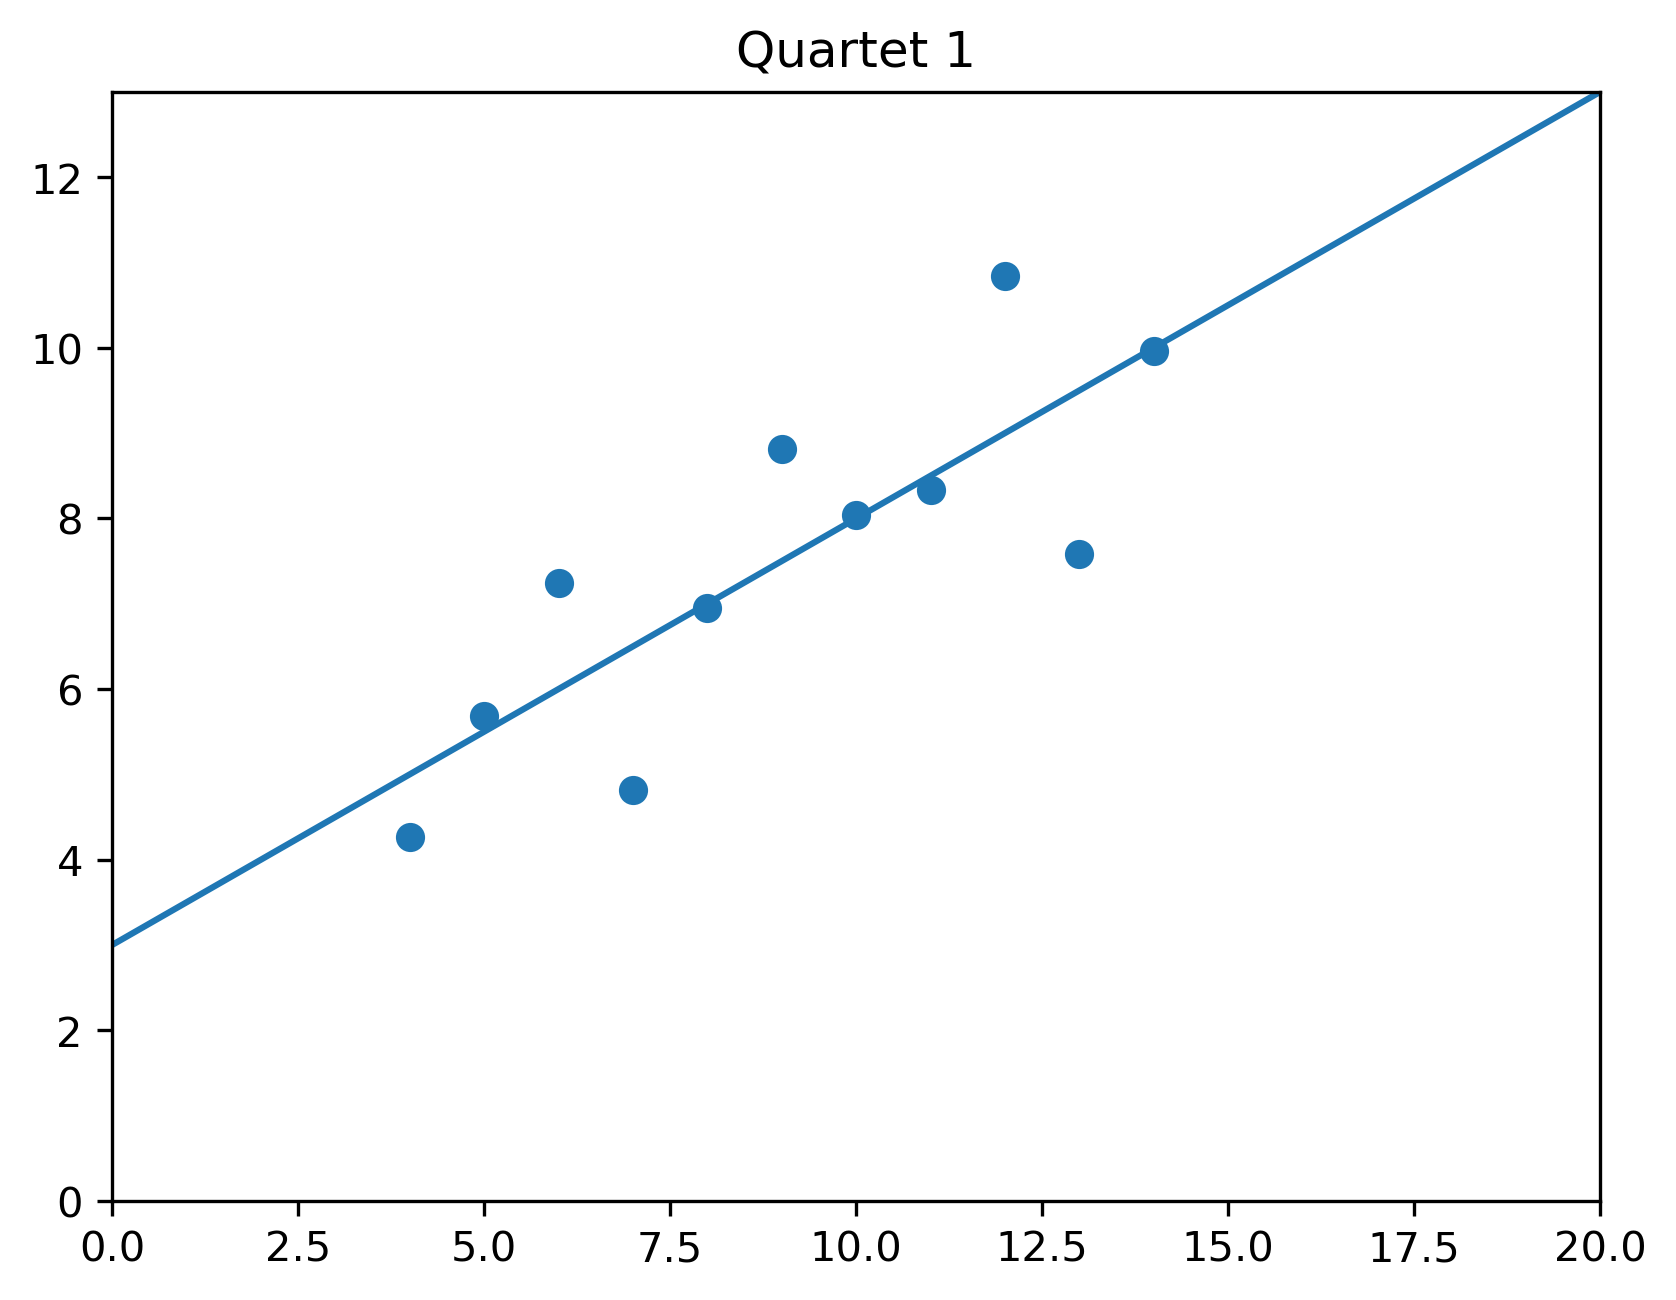

Quartet 2 
Mean of X:  9.0 
Mean of Y:  7.50090909090909 
Variance of X:  10.0 
Variance of Y:  3.752390082644628 
Slope:  0.5000000000000001 
Intercept:  3.000909090909089 
Correlation Coefficient:  0.816236506000243


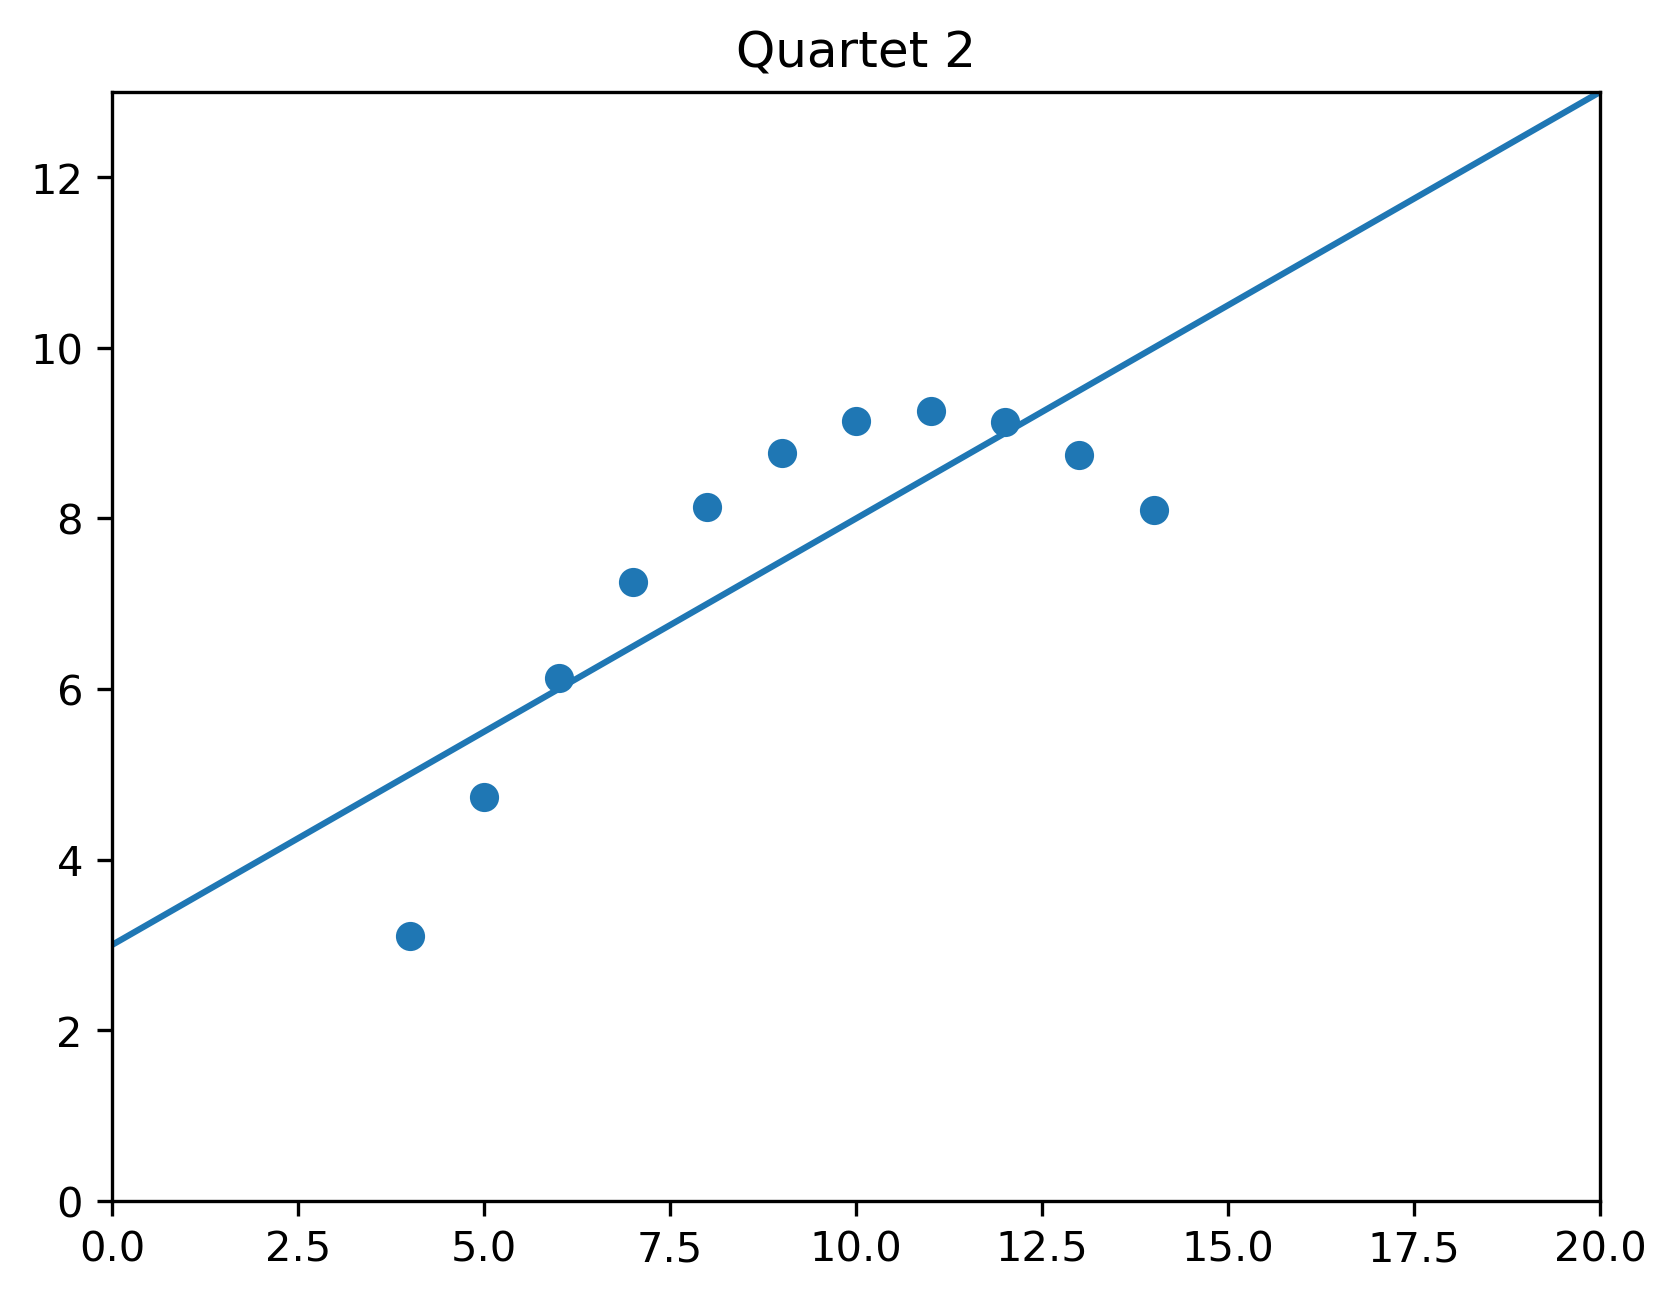

Quartet 3 
Mean of X:  9.0 
Mean of Y:  7.5 
Variance of X:  10.0 
Variance of Y:  3.747836363636364 
Slope:  0.4997272727272729 
Intercept:  3.002454545454544 
Correlation Coefficient:  0.8162867394895984


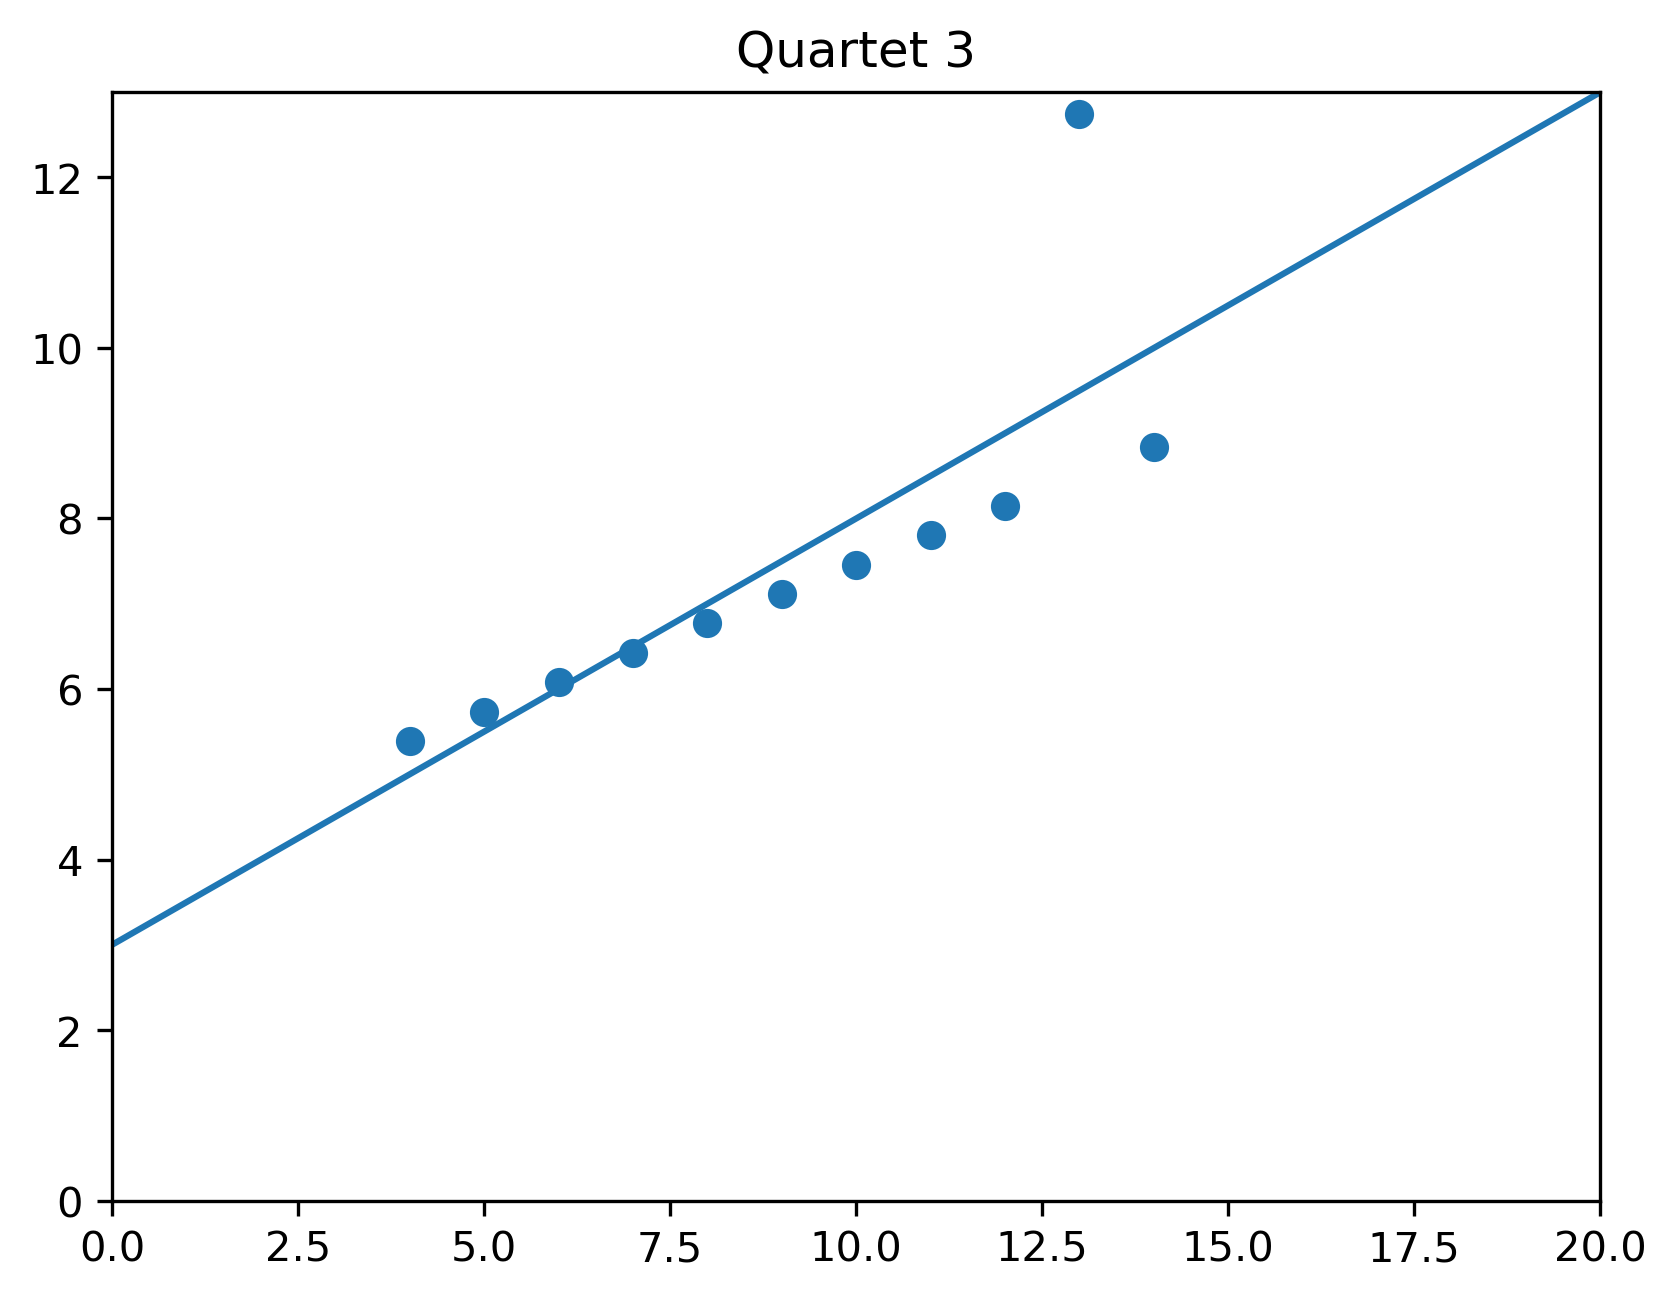

Quartet 4 
Mean of X:  9.0 
Mean of Y:  7.500909090909091 
Variance of X:  10.0 
Variance of Y:  3.7484082644628103 
Slope:  0.4999090909090909 
Intercept:  3.0017272727272726 
Correlation Coefficient:  0.8165214368885028


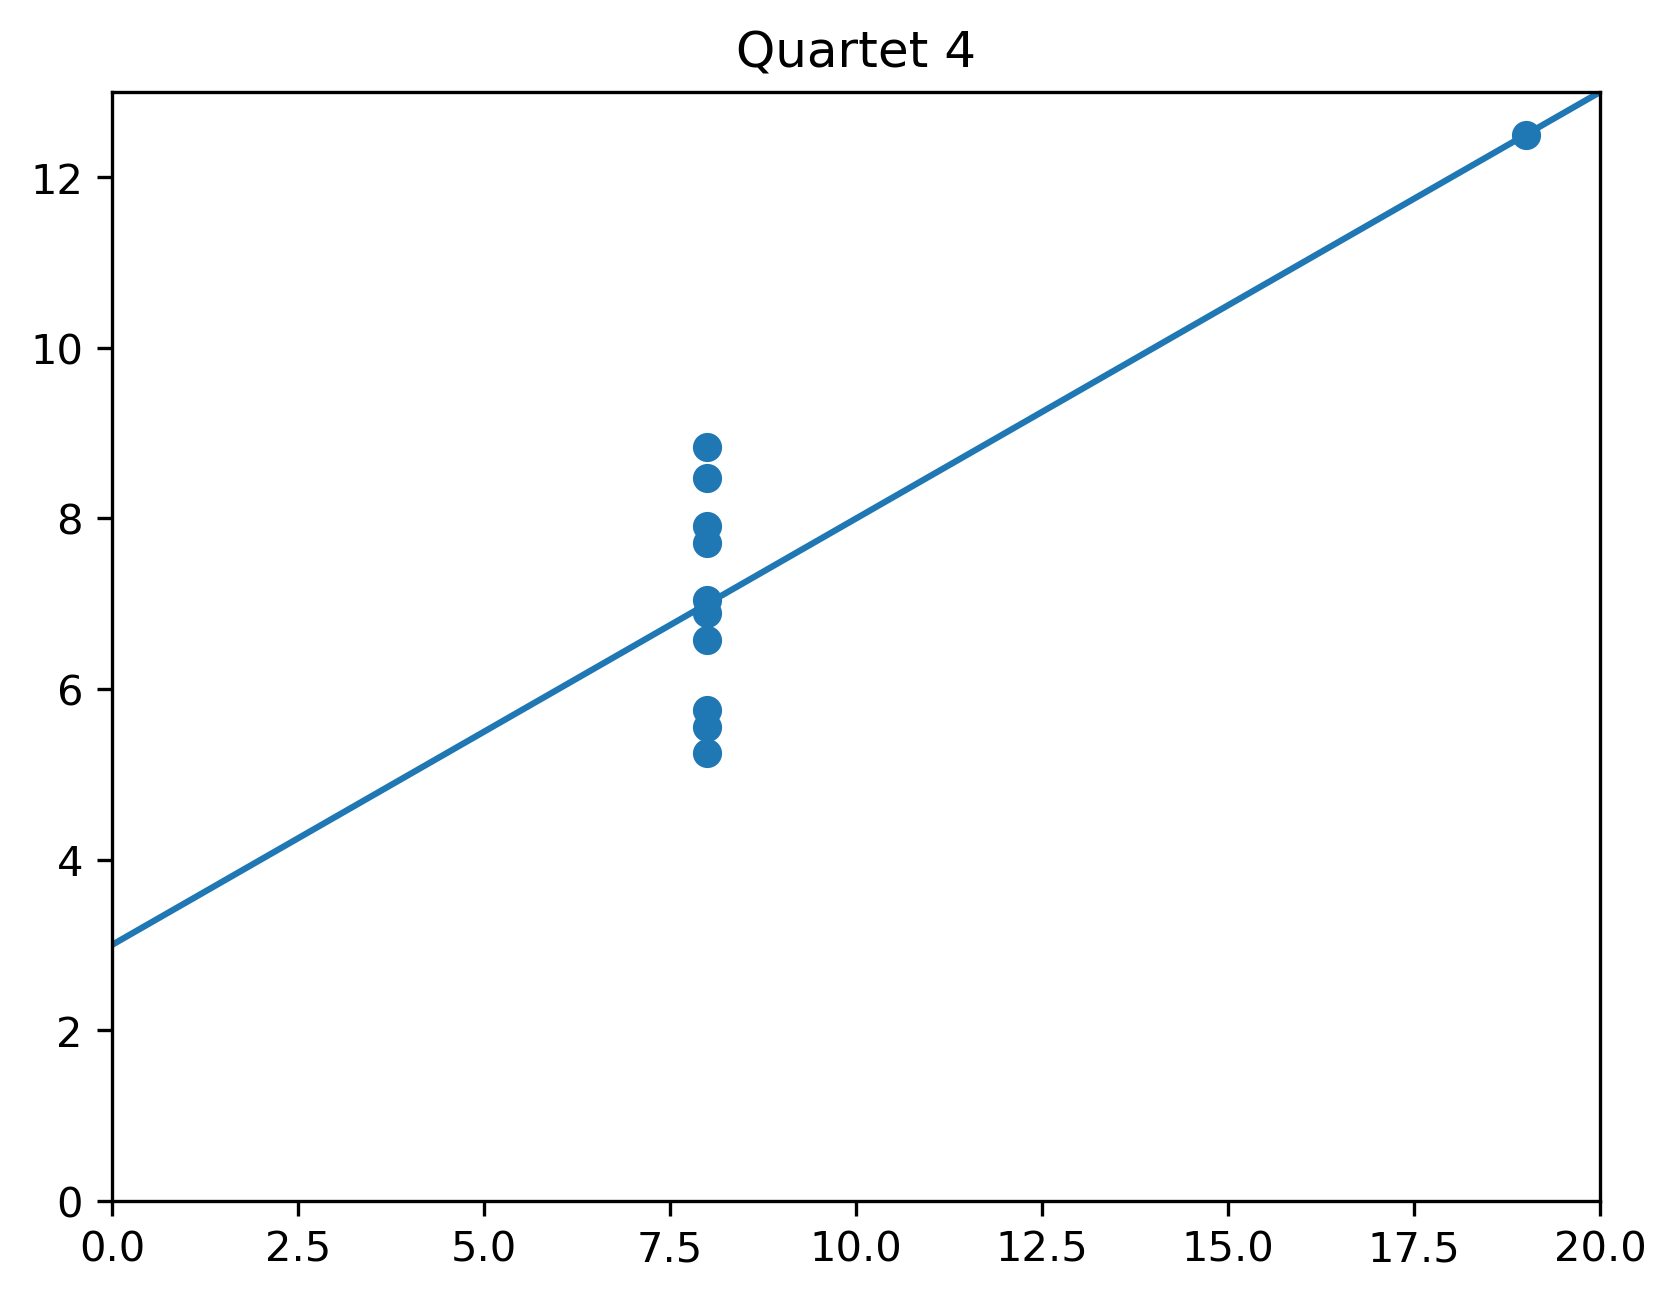

In [64]:
A = np.load("anscombe.npy")
for i in range(4):
    X = A[:, 2*i]
    Y = A[:, 2*i + 1]
    slope, intercept, correlation, _, _ = linregress(X,Y)
    x = np.linspace(0,20,51)
    # Generating the function
    f = lambda x: slope*x + intercept
    # Plotting
    plt.scatter(X,Y)
    plt.xlim(0,20)
    plt.ylim(0,13)
    plt.plot(x,f(x))
    plt.title("Quartet "+str(i+1))
    #Find the means and variances
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    variance_x = np.var(X)
    variance_y = np.var(Y)
    # Printing the report
    print("Quartet",i+1,"\n"
          "Mean of X: ", mean_x, "\n"
          "Mean of Y: ", mean_y, "\n"
          "Variance of X: ", variance_x, "\n"
          "Variance of Y: ", variance_y, "\n"
          "Slope: ", slope, "\n"
          "Intercept: ", intercept, "\n"
          "Correlation Coefficient: ", correlation)

    plt.show()




### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.special.comb()`.)

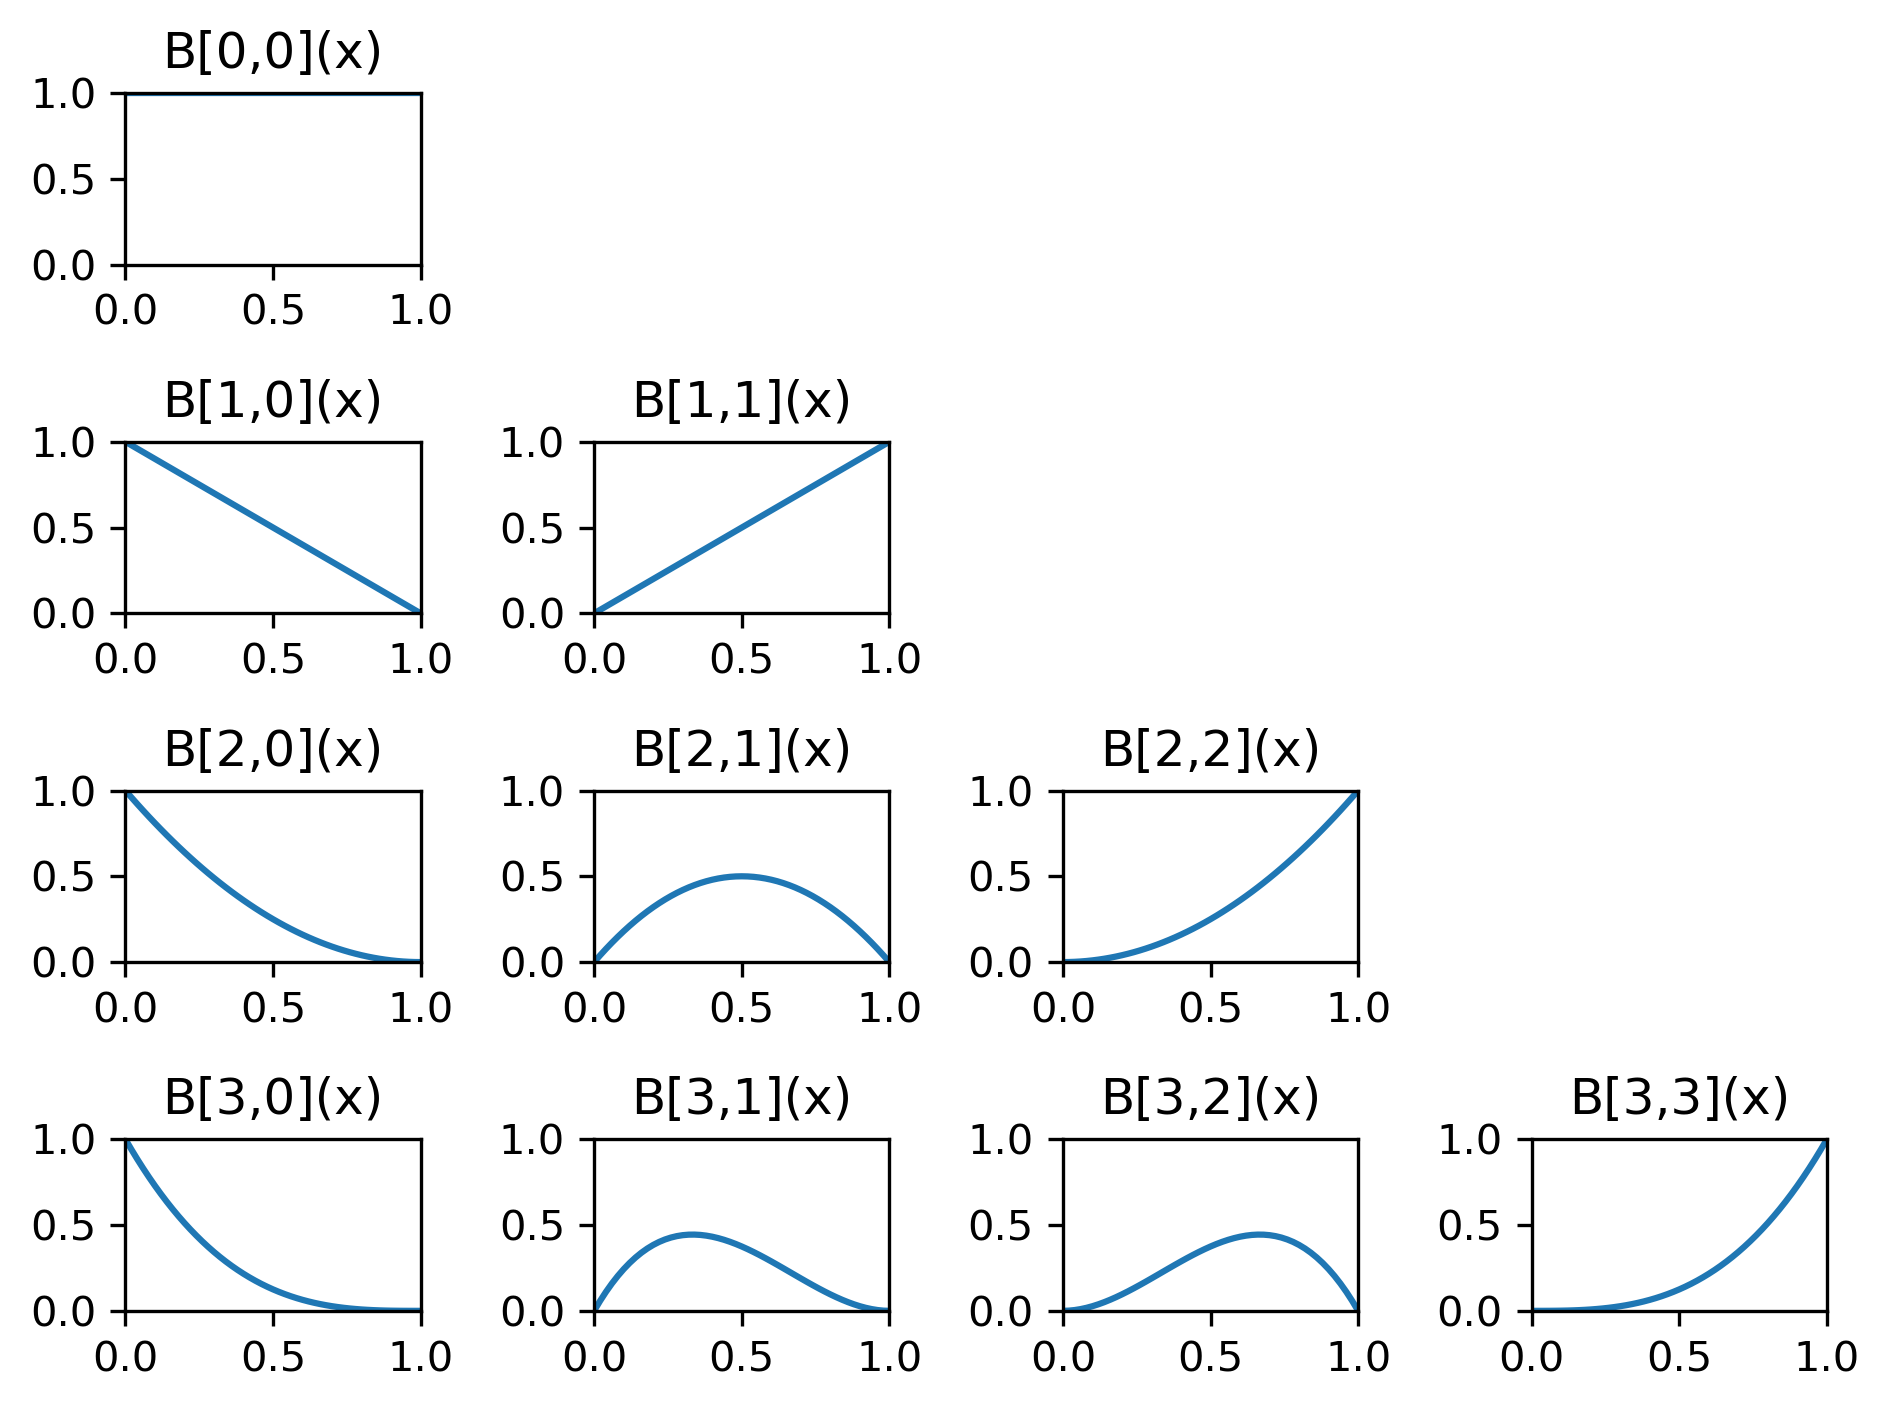

In [65]:

for n in range(4):
    for v in range(n+1):
        b = binom(n,v)
        x = np.linspace(0, 1, 51)
        f = lambda x: b*(x**v)*(1-x)**(n-v)

        # Plotting
        plt.subplot(4, 4, 4*n+v+1)
        plt.plot(x, f(x))
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.title("B[" + str(n) + "," + str(v) + "](x)")

plt.tight_layout()
plt.show()


### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

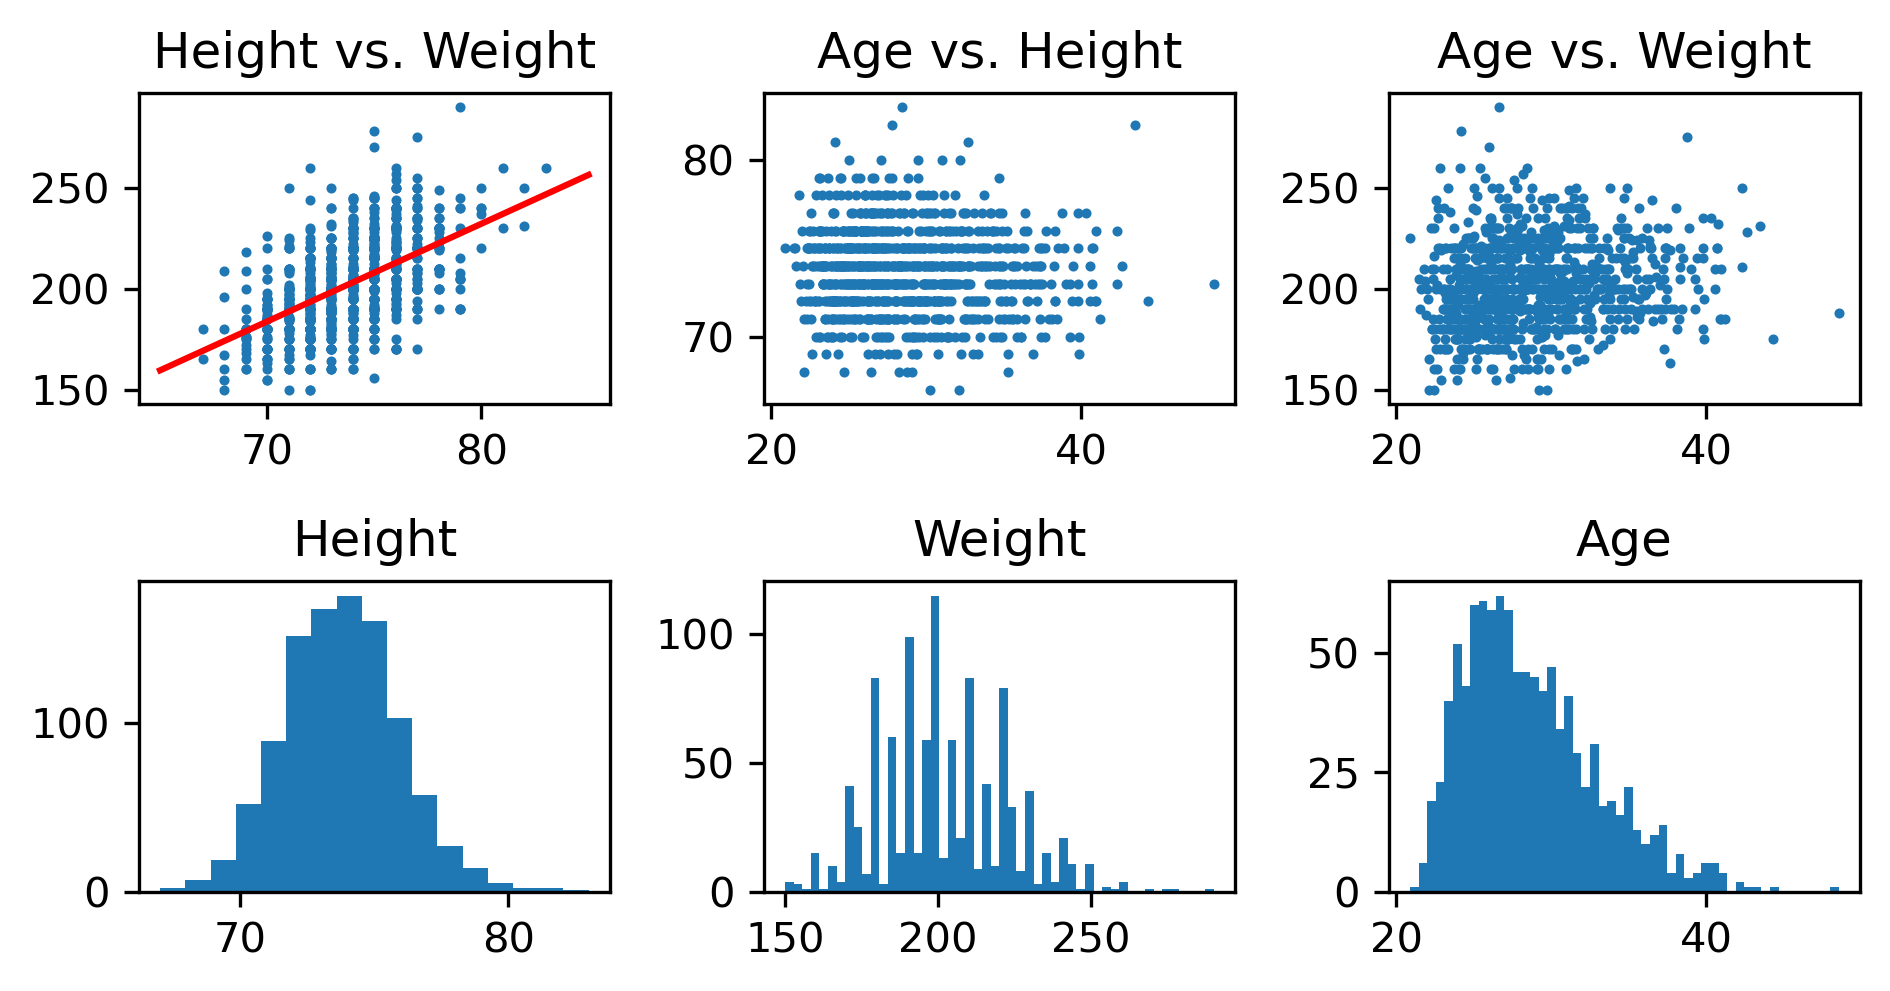

In [66]:
height, weight, age = np.load("MLB.npy").T
slope, intercept, correlation, _, _ = linregress(height, weight)
x = np.linspace(65,85,51)
#Find the line
f = lambda x: slope*x + intercept

#Plot everything
plt.subplot(331)
plt.scatter(height, weight, s = 2)
plt.plot(x, f(x), color = 'r')
plt.title("Height vs. Weight")

plt.subplot(332)
plt.scatter(age, height, s=2)
plt.title("Age vs. Height")

plt.subplot(333)
plt.scatter(age, weight, s=2)
plt.title("Age vs. Weight")

plt.subplot(334)
plt.hist(height, bins = 17)
plt.title("Height")

plt.subplot(335)
plt.hist(weight, bins = 50)
plt.title("Weight")

plt.subplot(336)
plt.hist(age, bins = 50)
plt.title("Age")


plt.tight_layout()
plt.show()



### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with at least two better visualizations. Include line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

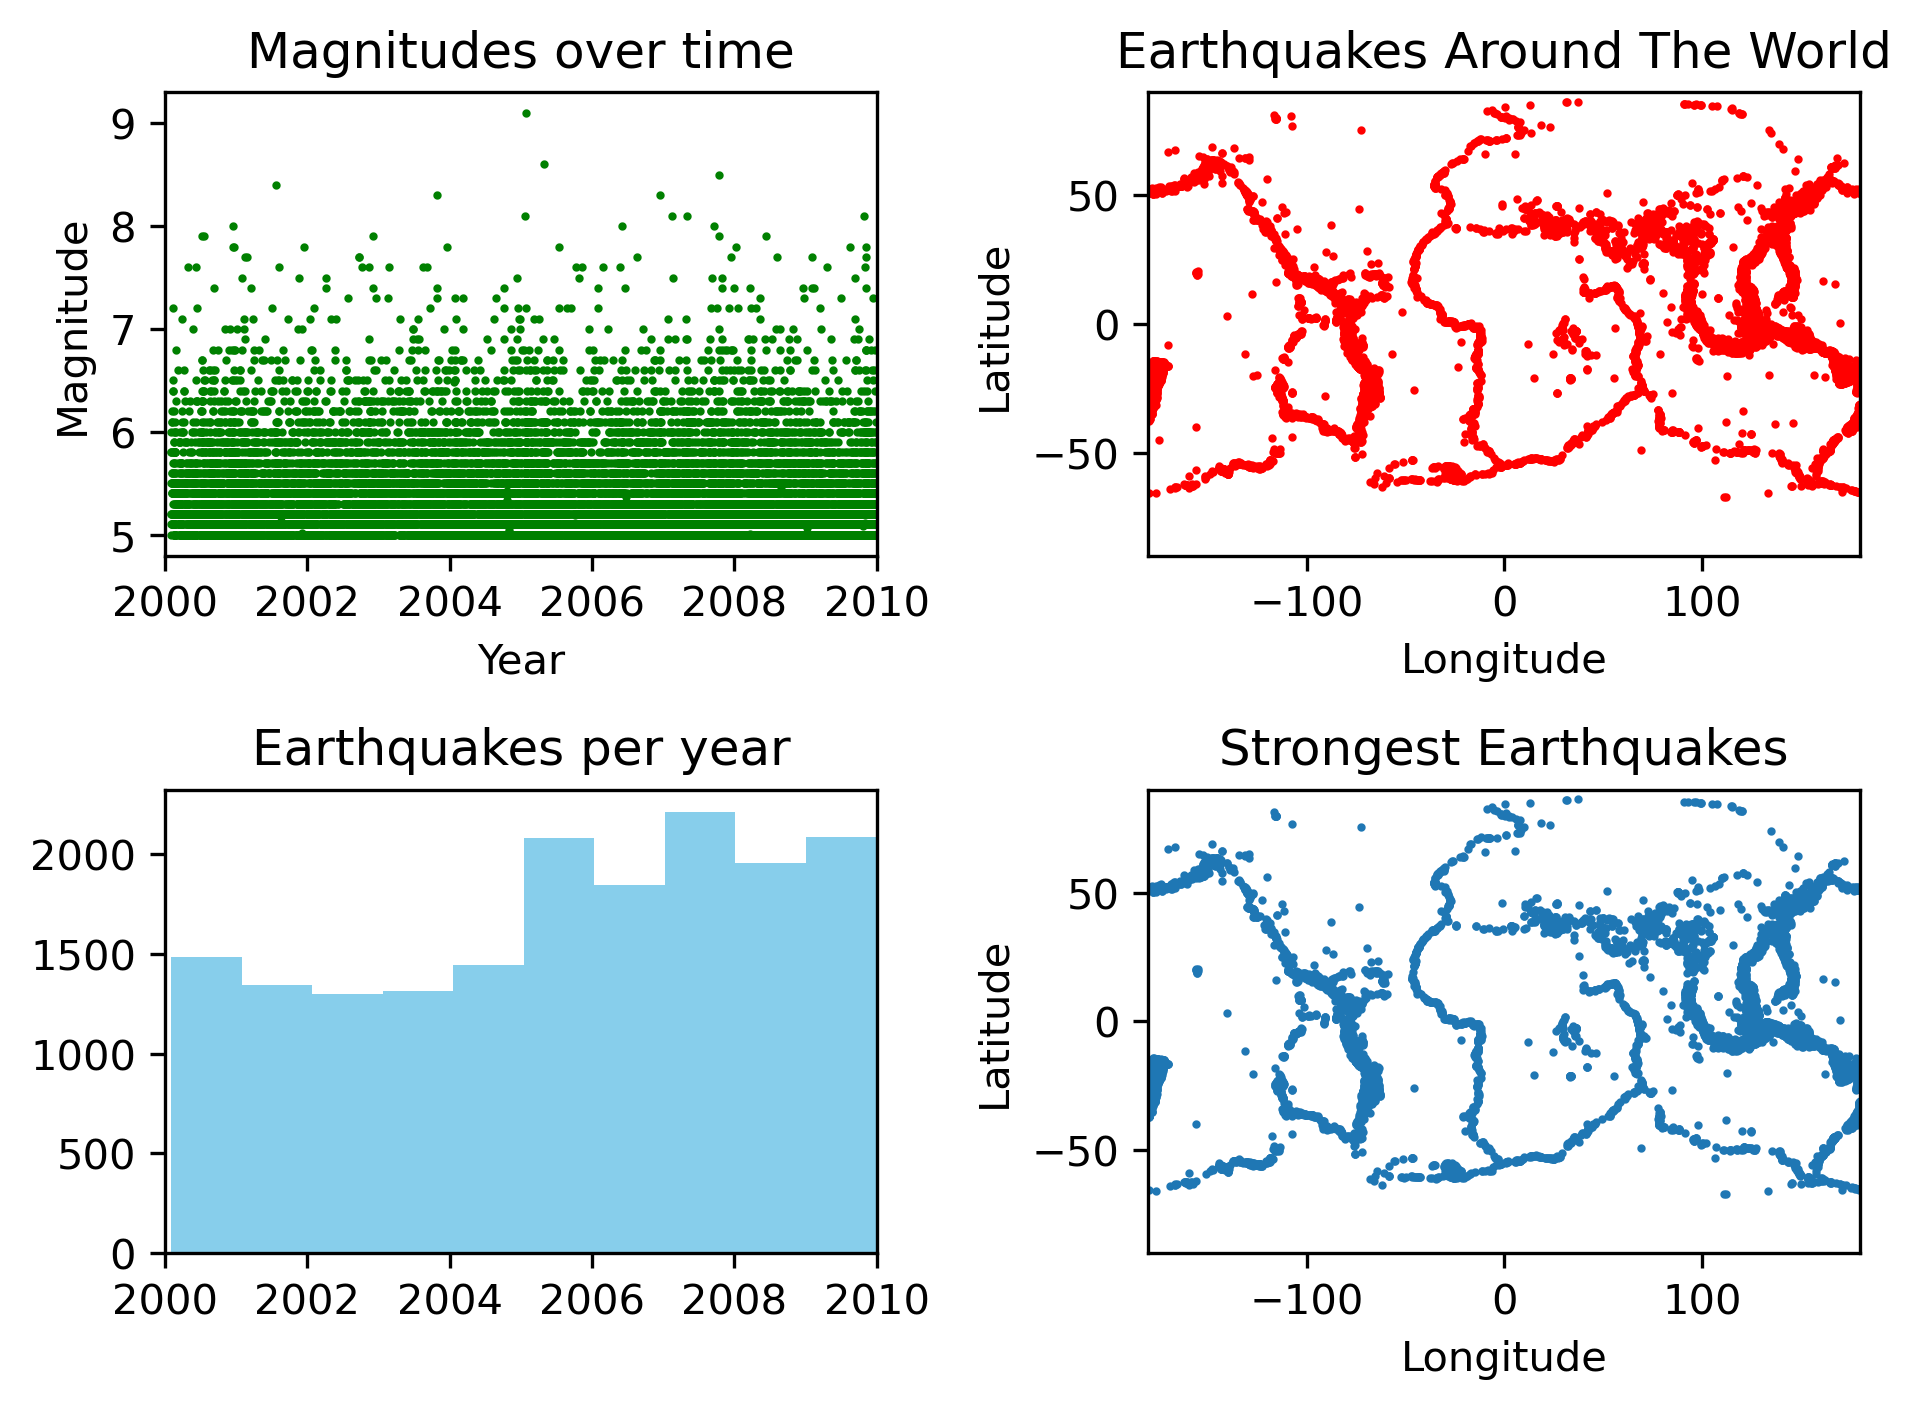

In [67]:
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T

plt.subplot(221)
plt.scatter(years, magnitudes, s=1, color='green')
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.xlim(2000,2010)
plt.title("Magnitudes over time")

plt.subplot(222)
plt.scatter(longitude, latitude, s=1, color='red')
plt.title("Earthquakes Around The World")
plt.xlim(-180,180)
plt.xlabel("Longitude")
plt.ylim(-90,90)
plt.ylabel("Latitude")

plt.subplot(223)
plt.hist(years, color="skyblue")
plt.title("Earthquakes per year")
plt.xlim(2000,2010)

#Find the longitude and latitude only if magnitude is above 5
long = []
lat = []
for i in range(len(magnitudes)):
    if magnitudes[i] > 5:
        long.append(longitude[i])
        lat.append(latitude[i])

plt.subplot(224)
plt.scatter(long, lat, s=1)
plt.title("Strongest Earthquakes")
plt.xlim(-180,180)
plt.xlabel("Longitude")
plt.ylim(-90,90)
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


### Problem 5

The _Rosenbrock function_ is defined as $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Also plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

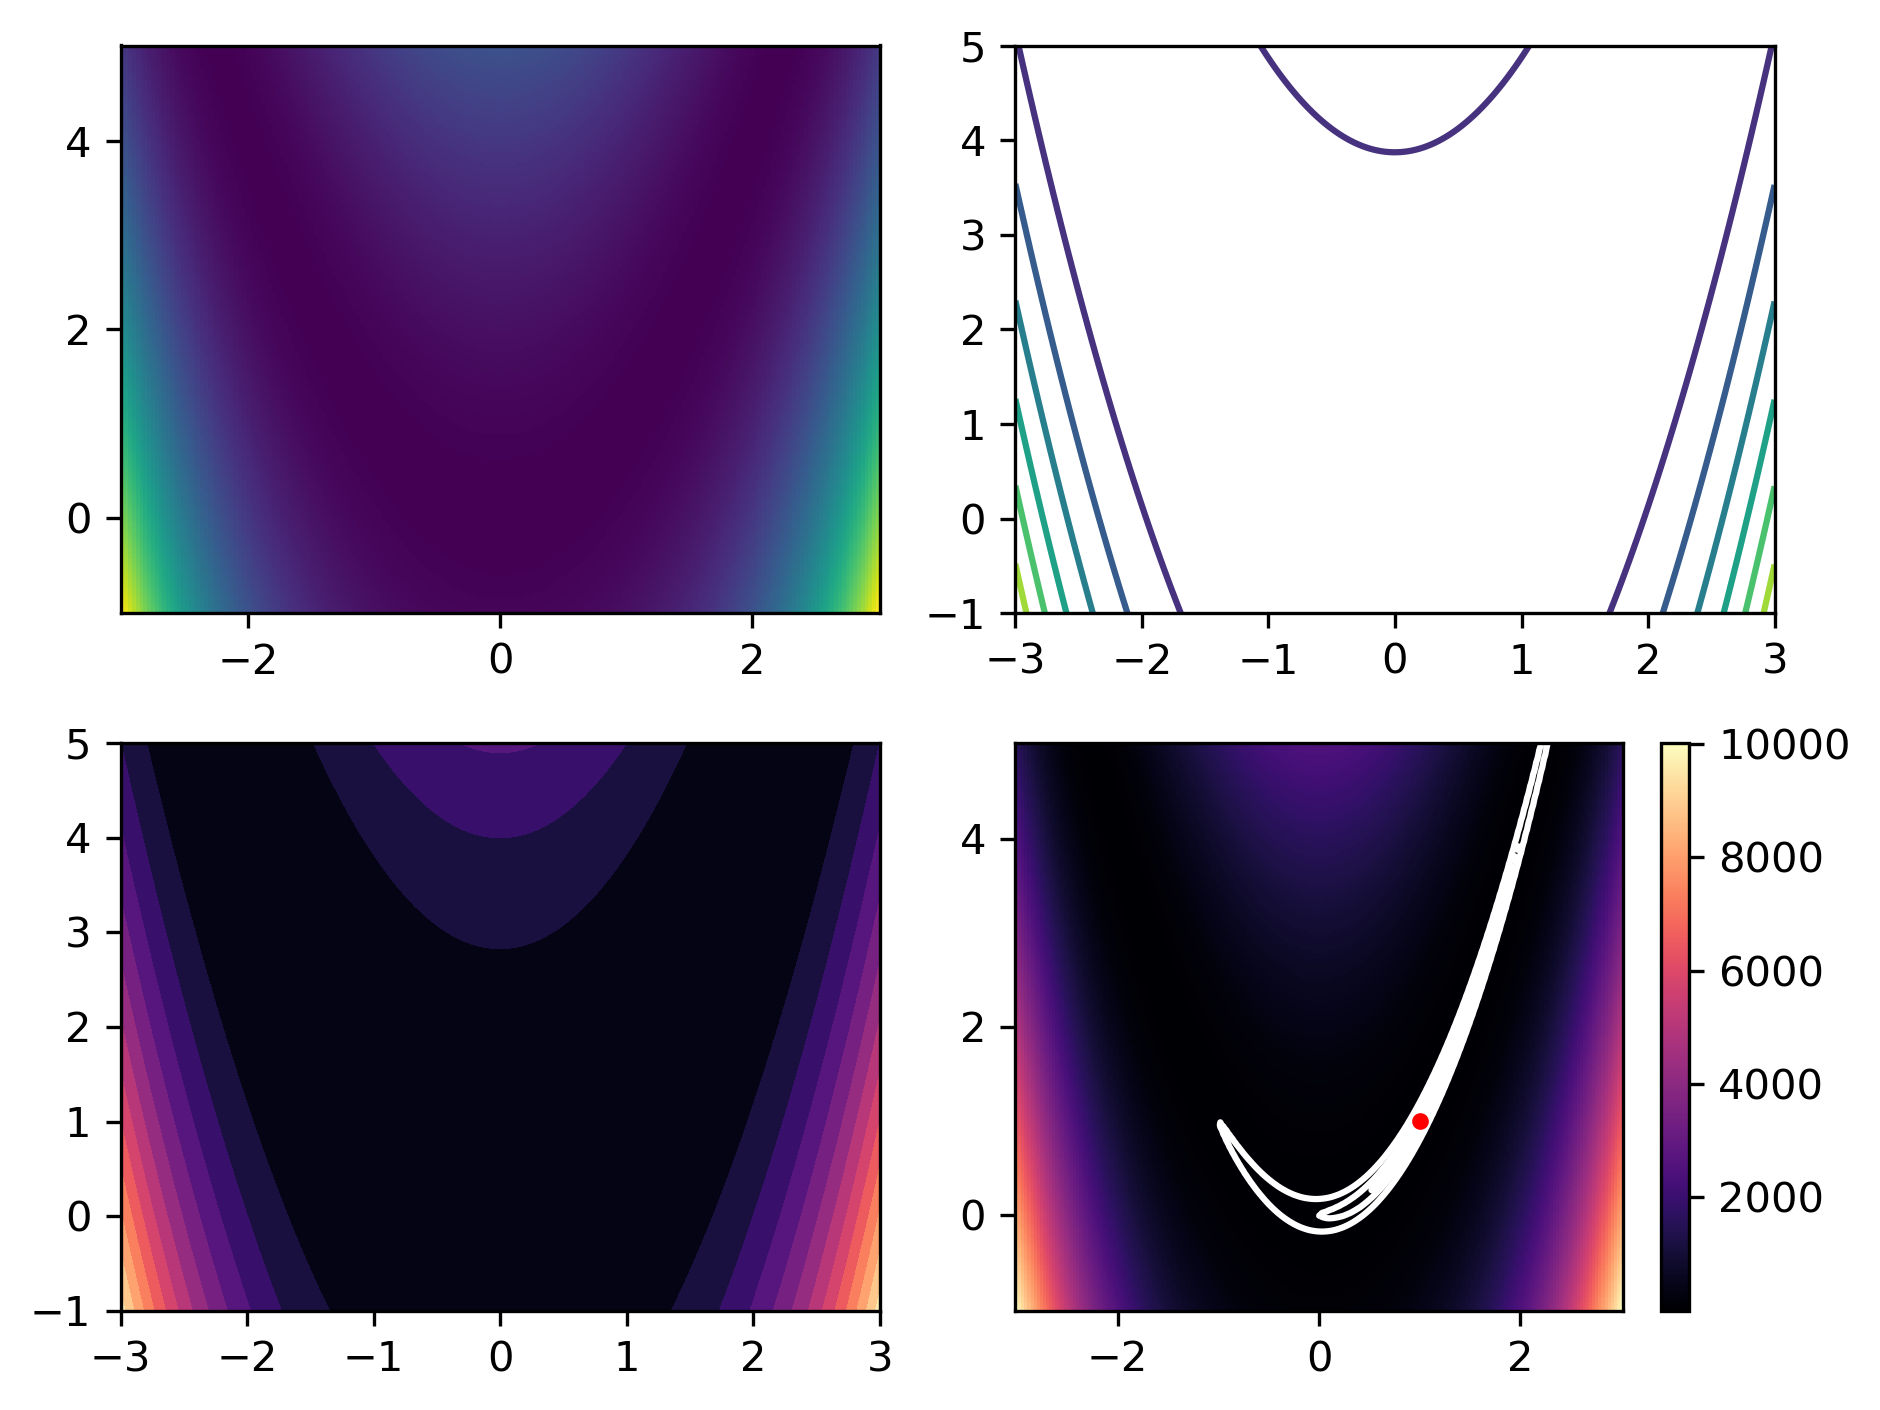

In [68]:
x = np.linspace(-3, 3, 200)
y = np.linspace(-1, 5, 200)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*((Y-X**2)**2)
fig, ax = plt.subplots(2,2)
ax[0,0].pcolormesh(X, Y, Z, cmap="viridis") # Heat map.
ax[0,1].contour(X, Y, Z, 6, cmap="viridis") # Contour map.
ax[1,0].contourf(X, Y, Z, 12, cmap="magma") # Filled contour map
ax[1,1].contour(X, Y, Z, [-1, -.25, 0, .25, 1, 4], colors="white")
ax[1,1].plot(1, 1, '.r')
cax = ax[1,1].pcolormesh(X, Y, Z, cmap="magma")
fig.colorbar(cax, ax=ax[1,1])

plt.tight_layout()
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

(array([10.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([4.58800000e+00, 5.17228229e+02, 1.02986846e+03, 1.54250869e+03,
        2.05514891e+03, 2.56778914e+03, 3.08042937e+03, 3.59306960e+03,
        4.10570983e+03, 4.61835006e+03, 5.13099029e+03, 5.64363051e+03,
        6.15627074e+03, 6.66891097e+03, 7.18155120e+03, 7.69419143e+03,
        8.20683166e+03, 8.71947189e+03, 9.23211211e+03, 9.74475234e+03,
        1.02573926e+04, 1.07700328e+04, 1.12826730e+04, 1.17953133e+04,
        1.23079535e+04, 1.28205937e+04, 1.33332339e+04, 1.38458742e+04,
        1.43585144e+04, 1.48711546e+04, 1.53837949e+04, 1.58964351e+04,
        1.64090753e+04, 1.69217155e+04, 1.74343558e+04, 1.79469960e+04]),
 <BarContainer object of 35 artists>)

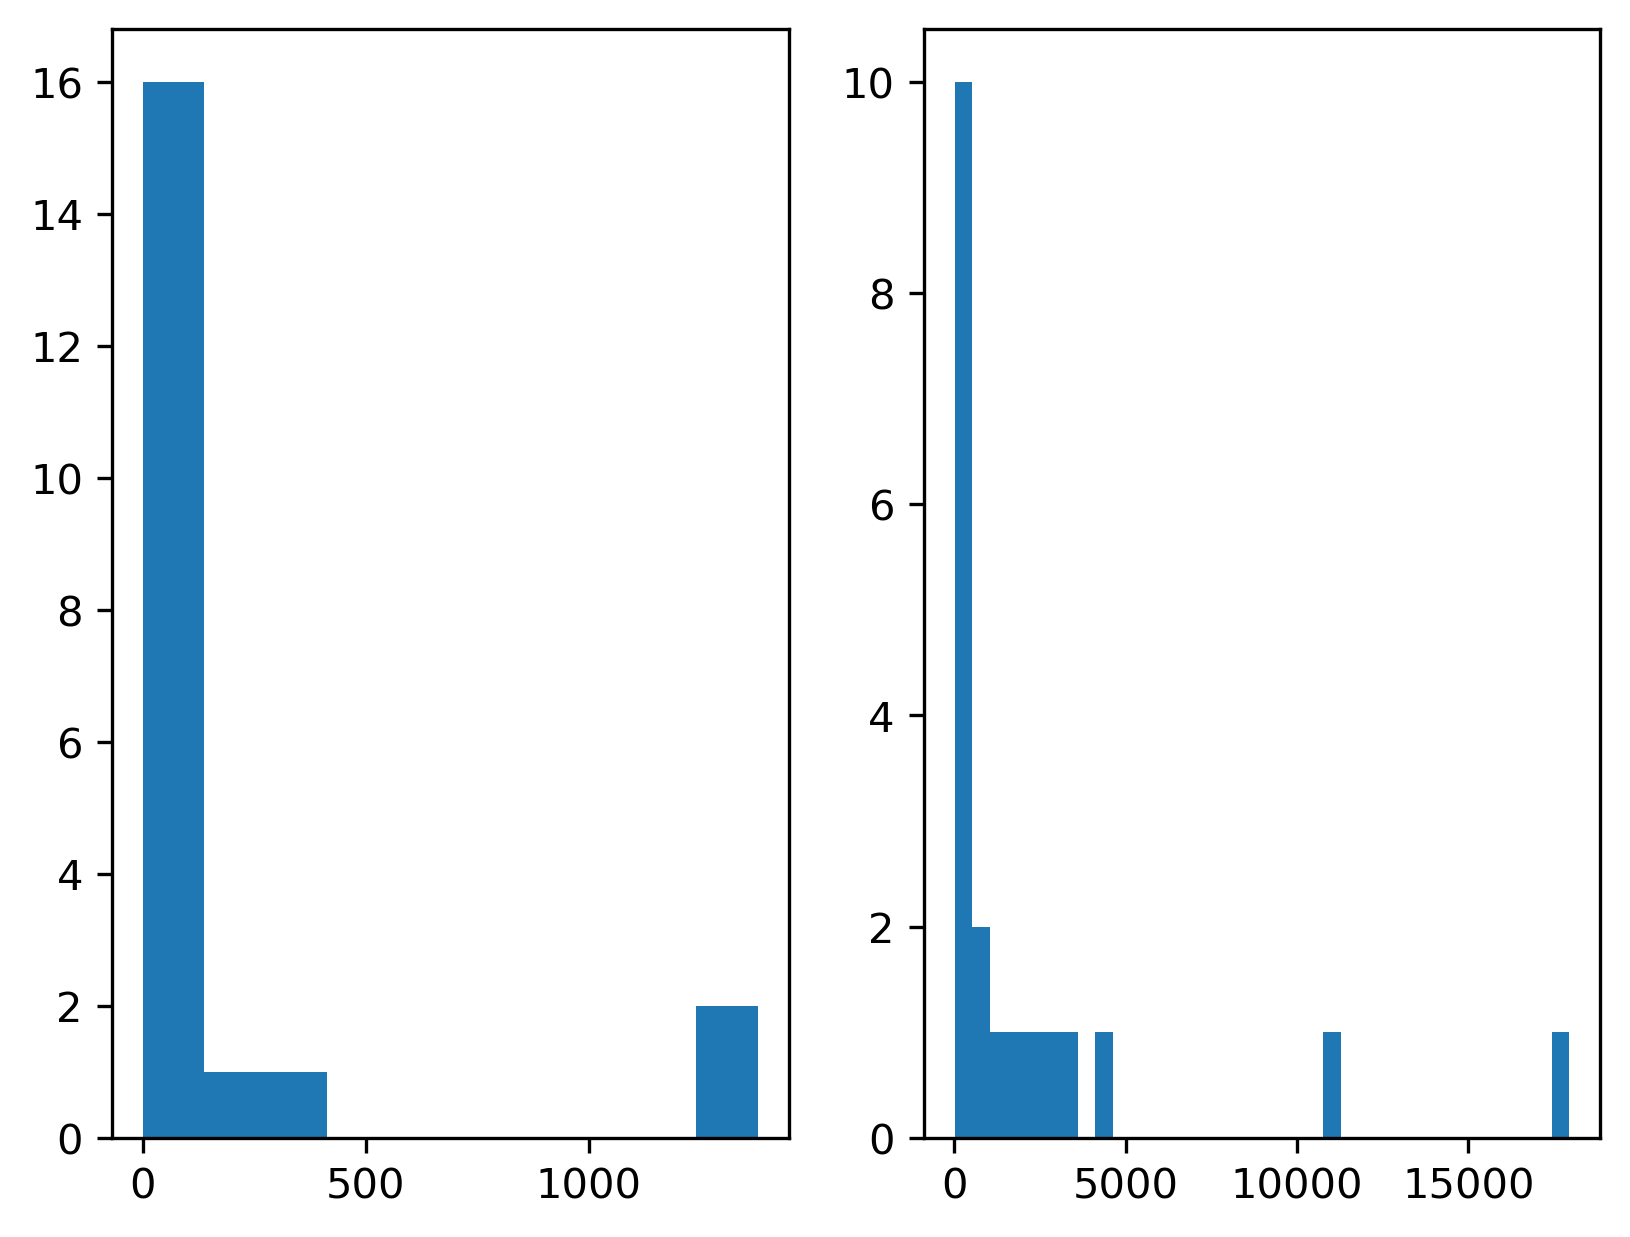

In [69]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

fig, ax = plt.subplots(1, 2)
ax[0].hist(population, bins=10)
ax[1].hist(gdp, bins=35)